In [1]:
import numpy as np      # import libraries
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
from PIL import ImageEnhance
%matplotlib inline

C:\Users\sf9m-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


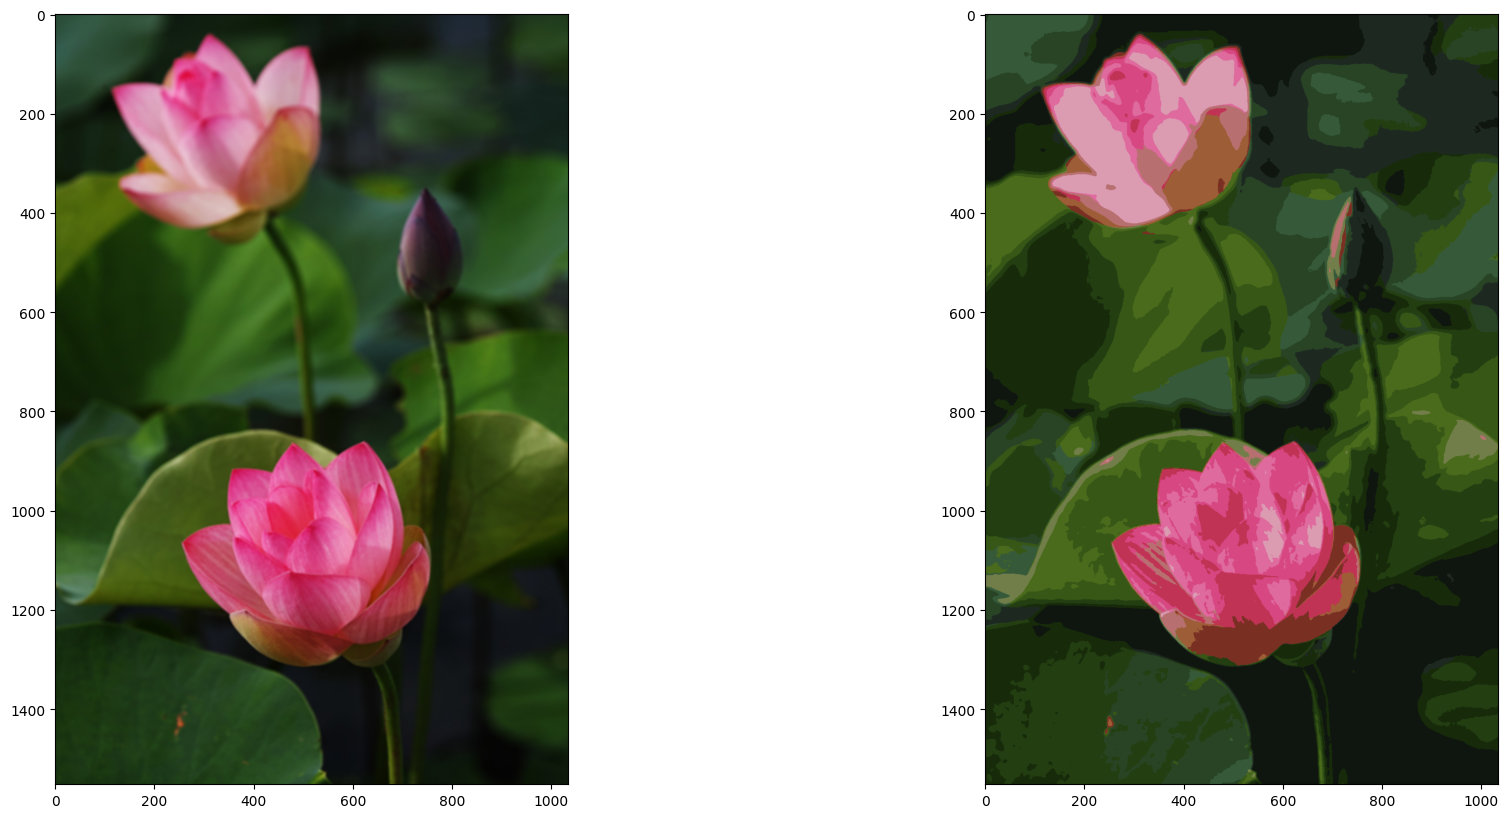

In [2]:
img_o = plt.imread('photo_data/flowers/SDQH1920.jpg')     # load the final image and change its type to PIL image to use pillow library

img_blur = cv2.blur(img_o, (5, 5))      # make the image blur
img = cv2.hconcat([img_blur])

img_s = img / 255    # scaling

img_s_pre_clusteing = img_s.reshape(img.shape[0] * img.shape[1], 3)     # reshape for clustring
img_s_pre_clusteing.shape

k_means = KMeans(16)              # apply K-means
k_means.fit(img_s_pre_clusteing)

img_d_reduction = k_means.cluster_centers_[k_means.labels_].reshape(img.shape[0], img.shape[1], 3)

fig = plt.figure(figsize = (22, 10))    # see the dimension reduction result
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img)
ax2.imshow(img_d_reduction)

#plt.imsave('original_image.jpg', img)
#plt.imsave('dimension_reduction_image.jpg', img_d_reduction)

plt.show()

In [3]:
image = (255 * (0.299 * img_d_reduction[:, :, 0] + 0.587 * img_d_reduction[:, :, 1] + 0.114 * img_d_reduction[:, :, 2]))    # convert to a gray image

In [4]:
image = (image * 255).astype(np.uint8)
print(image.shape)
print(type(image))
image

(1552, 1035)
<class 'numpy.ndarray'>


array([[156, 156, 156, ...,  24,  24,  24],
       [156, 156, 156, ...,  24,  24,  24],
       [156, 156, 156, ...,  24,  24,  24],
       ...,
       [146, 146, 146, ..., 199, 199, 199],
       [146, 146, 146, ..., 199, 199, 199],
       [146, 146, 146, ..., 199, 199, 199]], dtype=uint8)

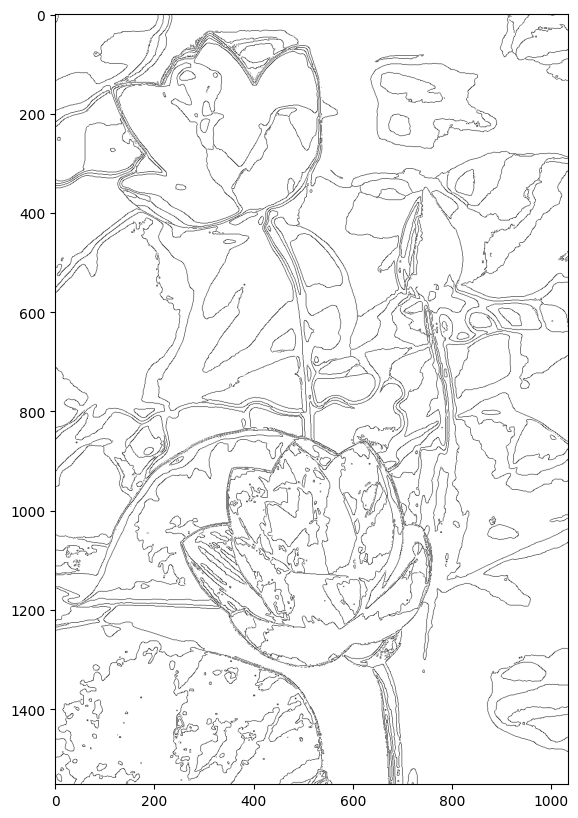

In [5]:
plt.figure(figsize = (20, 10))
canny_image = cv2.Canny(image, 50, 100)          # Canny - edge detection
canny_image_r = cv2.bitwise_not(canny_image)     # reverse black and white

#plt.imsave('edge_detection_image.jpg', canny_image_r, cmap = 'gray')

plt.imshow(canny_image_r, cmap = 'gray')
plt.show()

In [6]:
canny_image_r

for i in range(canny_image_r.shape[0]):         # overlap the image with dimension reduction and edges
    for j in range(canny_image_r.shape[1]):
        for k in range(3):
            if canny_image_r[i, j] == 0:
                img_d_reduction[i, j, k] = 0

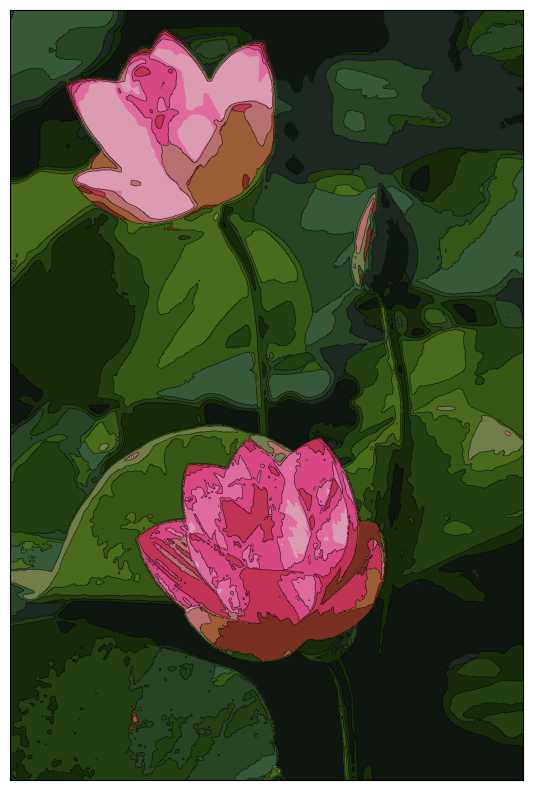

In [7]:
plt.figure(figsize = (20, 10))

plt.imshow(img_d_reduction)
#plt.imsave('data/final_image_blur.jpg', img_d_reduction)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

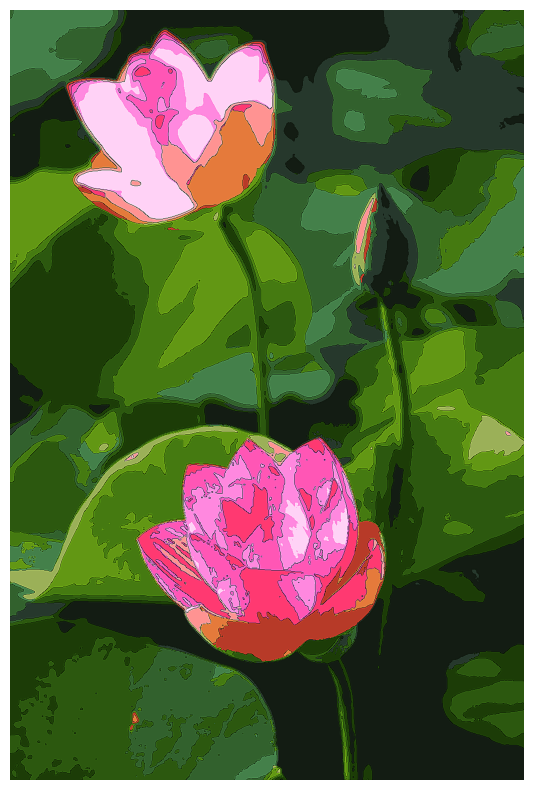

In [8]:
arrayimage = np.asarray(img_d_reduction)
scale = 255.0 / np.max(arrayimage)

my_img = Image.fromarray(np.uint8(arrayimage * scale))

enhancer = ImageEnhance.Sharpness(my_img)     # Change brightness, etc.
img_1 = enhancer.enhance(3.0)

enhancer = ImageEnhance.Brightness(img_1)
img_2 = enhancer.enhance(1.2)

converter = ImageEnhance.Color(img_2)
img_3 = converter.enhance(1.2)

img_3.save('photo_data/flowers/final_image_3.png')
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.imshow(img_3)
plt.show()